<a href="https://colab.research.google.com/github/AlImran1027/CSE299_Project/blob/Main/Data_Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
dataset='/content/Cardiovascular_Disease_Dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [ ]:
import pandas as pd
df=pd.read_csv('/content/Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset.csv')
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [ ]:
df.isnull().sum()

,0
patientid,0
age,0
gender,0
chestpain,0
restingBP,0
serumcholestrol,0
fastingbloodsugar,0
restingrelectro,0
maxheartrate,0
exerciseangia,0


<ipython-input-29-1d9d2f356383>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<Axes: xlabel='age', ylabel='Density'>

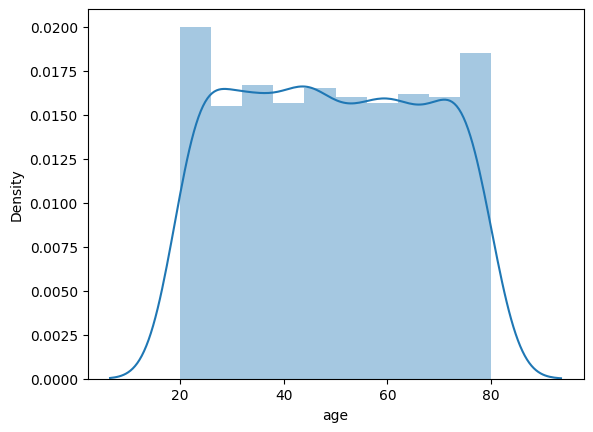

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df.age)

In [ ]:
df.shape

(1000, 14)

In [ ]:
#data standardization
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
print(df)

     patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0       103368   53       1          2        171                0   
1       119250   40       1          0         94              229   
2       119372   49       1          2        133              142   
3       132514   43       1          0        138              295   
4       146211   31       1          1        199                0   
..         ...  ...     ...        ...        ...              ...   
995    9949544   48       1          2        139              349   
996    9953423   47       1          3        143              258   
997    9965859   69       1          0        156              434   
998    9988507   45       1          1        186              417   
999    9990855   25       1          0        158              270   

     fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                    0                1           147              0      5.3 

In [ ]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [ ]:
#x=df.drop(['target'],axis=1)
x=df.drop(columns='target',axis=1)
y=df['target']

In [ ]:
print(x)

     patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0       103368   53       1          2        171                0   
1       119250   40       1          0         94              229   
2       119372   49       1          2        133              142   
3       132514   43       1          0        138              295   
4       146211   31       1          1        199                0   
..         ...  ...     ...        ...        ...              ...   
995    9949544   48       1          2        139              349   
996    9953423   47       1          3        143              258   
997    9965859   69       1          0        156              434   
998    9988507   45       1          1        186              417   
999    9990855   25       1          0        158              270   

     fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                    0                1           147              0      5.3 

In [ ]:
print(y)

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    0
Name: target, Length: 1000, dtype: int64


In [ ]:
#splitting the data in train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y, random_state=3)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(1000, 13) (800, 13) (200, 13)


In [ ]:
print(df.std())

patientid            2.895905e+06
age                  1.786473e+01
gender               4.242110e-01
chestpain            9.531571e-01
restingBP            2.996523e+01
serumcholestrol      1.324438e+02
fastingbloodsugar    4.567194e-01
restingrelectro      7.701228e-01
maxheartrate         3.419027e+01
exerciseangia        5.002462e-01
oldpeak              1.720753e+00
slope                1.003697e+00
noofmajorvessels     9.775846e-01
target               4.938055e-01
dtype: float64


In [ ]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [ ]:
x_train_standerd= scaler.transform(x_train)

In [ ]:
print(x_train_standerd)

[[-1.64953168 -0.81497576  0.54074681 ...  0.63991001 -1.55034744
  -0.25683275]
 [ 1.07168438  0.74372104  0.54074681 ... -0.18265307  0.46145783
  -0.25683275]
 [-1.30133812 -0.25829833  0.54074681 ...  1.34496408  0.46145783
  -0.25683275]
 ...
 [-0.70876456  0.91072427  0.54074681 ... -0.06514406  0.46145783
   0.77049825]
 [ 1.10458237  1.41173396  0.54074681 ... -1.00521615 -0.5444448
   0.77049825]
 [ 0.25475165 -0.75930801 -1.84929433 ... -1.24023417 -1.55034744
  -0.25683275]]


In [ ]:
x_test_standerd=scaler.transform(x_test)

In [ ]:
print(x_train_standerd.std())

1.0


In [ ]:
print(x_test_standerd.std())

1.021453126097111


In [ ]:
df['target'].value_counts()

,count
target,
1,580
0,420


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model= LogisticRegression()

In [ ]:
model.fit(x_train_standerd,y_train)

LogisticRegression()

In [ ]:
#acuracy score_train data
x_train_prediction=model.predict(x_train_standerd)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [ ]:
print('accuracy on training data:',training_data_accuracy)

accuracy on training data: 0.96625


In [ ]:
#acuracy score_test data
x_test_prediction=model.predict(x_test_standerd)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [ ]:
print('accuracy on test data:',test_data_accuracy)

accuracy on test data: 0.965
